# What Makes a Top 10 NBA Draft Pick?
**Analyzing Player Attributes from Top 10 NBA First Round Draft Picks**

Authors: William Miller, Matthew Muccio

## Project Abstract

Every June, the National Basketball Association (NBA) holds a draft, where each of the thirty teams have an oppurtunity to select two top prospects to join their organization. With only two rounds in the draft - and only two chances per team - it is crucial that a team does proper research, scouting, and analysis to ensure that their draft picks have a significant impact on their odds at winning a championship.

Using the NBA data API for all players currently in the league, we will examine top 10 draft picks and see how they compare to all players in the league. Then we will make use of various individual player attributes to determine what properties correlate to top NBA draft picks. After having read through our data analysis, we hope that you will understand the importance of research and scouting that NBA teams undergo in selecting top draft picks.

### Project Outline

1. Project Introduction
  - A. Libraries and Dependencies
  - B. Data Sources
  - C. Importing and Examining the Dataset
  - D. Getting Top 10 Draft Picks
  - E. Various Data Trends of Top 10 Draft Picks
2. Exploring Top 10 Draft Picks
  - A.How Many Current NBA Players Are Top 10 Draft Picks?
  - B. How Many Current NBA Players Are Not Top 10 Draft Picks?
  - C. Top 10 Draft Picks by Position
  - D. Top 10 Draft Picks by Size
  - E. Top 10 Draft Picks by Place of Origin
3. Analysis of Top 10 Draft Picks' Attributes
  - A. What Attributes Matter Most? 
  - B. Reducing and Comparing Attributes
4. Finding Key Attributes Using Multiple Linear Regression
  - A. Null Hypothesis Testing
  - B. Using SciKit-Learn and StatsModel for Regression Model
5. Predicting the Ideal Draft Pick Based on Player Attributes with ML
  - A. Training and Testing
6. Project Conclusion
  - A. Closing Statement About Attributes
  - B. Closing Statement About Draft Pick Prediction
  - C. Final Thoughts & Other Resources
****

# 1. Project Introduction

## 1A. Libraries and Dependencies

- Python Standard Library Modules:
  - JSON

- Third-Party Library Modules:
  - Matplotlib - pyplot
  - Pandas
  - Requests
  - Scikit-learn 
  - Seaborn
  - StatsModels - API 

In [1]:
import json

import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm

## 1B. Data Sources

The dataset used in our analysis includes all information from almost 500 current players in the NBA. The NBA releases an updated version of this data everyday. It contains information such as player names, height, weight, college, draft number, and country of origin. We will be looking at information from only the players who were drafted in the top 10 of their class. 

The dataset can be found [here](http://data.nba.net/10s/prod/v1/2018/players.json). It comes directly from the NBA website.

## 1C. Importing and Examining the Dataset

Loading the JSON into a Pandas dataframe. We organize the dataframe into only the columns of data we will use for analysis. These include: 
    - First Name
    - Last Name
    - Position
    - Height (Feet)
    - Height (Inches)
    - Weight (Pounds)
    - Date of Birth (Year)
    - Date of Birth (Month)
    - Date of Birth (Day)
    - NBA Debut Year
    - Number of Years in NBA
    - College
    - Last affiliation (College or Location)
    - Country
    - Draft Round Number
    - Draft Pick Number
    - Draft Year
    - Team

In [2]:
# Prepping player data from NBA API to be added to a Pandas DataFrame.
endpoint = "http://data.nba.net/10s/prod/v1/2018/players.json"
r = requests.get(endpoint)
raw_data = r.json()

player_data = raw_data["league"]["standard"]

players = []

for player in player_data:
    players.append(
    {
        "firstName": player["firstName"],
        "lastName": player["lastName"],
        "pos": player["pos"],
        "heightFeet": int(player["heightFeet"]) if not player["heightFeet"] == "-" else "",
        "heightInches": int(player["heightInches"]) if not player["heightInches"] == "-" else "",
        "heightTotal": player["heightFeet"] + " " + player["heightInches"],
        "weightPounds": int(player["weightPounds"]) if not player["weightPounds"] == "" else "",
        "birthYear": int(player["dateOfBirthUTC"][:4:]) if not player["dateOfBirthUTC"][:4:] == "" else "",
        "birthMonth": int(player["dateOfBirthUTC"][5:7:]) if not player["dateOfBirthUTC"][5:7:] == "" else "",
        "birthDay": int(player["dateOfBirthUTC"][8:10:]) if not player["dateOfBirthUTC"][8:10:] == "" else "",
        "nbaDebutYear": player["nbaDebutYear"],
        "yearsPro": player["yearsPro"],
        "collegeName": player["collegeName"],
        "lastAffiliation": player["lastAffiliation"],
        "country": player["country"],
        "roundNum": int(player["draft"]["roundNum"]) if not player["draft"]["roundNum"] == "" else "",
        "pickNum": int(player["draft"]["pickNum"]) if not player["draft"]["pickNum"] == "" else "",
        "draftYear": int(player["draft"]["seasonYear"]) if not player["draft"]["seasonYear"] == "" else "",
        "teamId": player["draft"]["teamId"]
    })

df = pd.DataFrame(players)
df.head()

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
0,1,8,1993,,Spain,2013,Alex,6,6,6 6,Spain/Spain,Abrines,2016,32,G,2,1610612760,200,2
1,4,5,1996,St. Bonaventure,USA,,Jaylen,6,2,6 2,St. Bonaventure/USA,Adams,2018,,G,,,190,0
2,20,7,1993,Pittsburgh,New Zealand,2013,Steven,7,0,7 0,Pittsburgh/New Zealand,Adams,2013,12,C,1,1610612760,265,5
3,18,7,1997,Kentucky,USA,2017,Bam,6,10,6 10,Kentucky/USA,Adebayo,2017,14,C-F,1,1610612748,255,1
4,5,6,1993,Illinois State,Trinidad and Tobago,,DeVaughn,6,6,6 6,Illinois State/Trinidad and Tobago,Akoon-Purcell,2018,,G-F,,,200,0


We will use pandas describe() to show some statistics about the dataset. First, we can see there is 498 players in the current NBA league. There is some pretty interesting results to look at here. Like the top 'lastAffiliation' is Kentucky (University of Kentucky). We will see a lot of these results play in later as we look deeper into the dataset. Another interesting result is, the 'firstName' and 'lastName' columns.

In [3]:
df.describe()

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
count,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498,498
unique,32,13,23,156,47,21,383,4,13,20,245,414,21,60,7,3,31,85,21
top,5,5,1994,,USA,,Tyler,6,10,6 10,Kentucky/USA,Williams,2017,,G,1,,220,0
freq,23,54,49,56,383,106,6,449,54,53,21,7,80,106,194,277,106,32,89


Since team identification for each player is stored as a number instead of a team name, we need to convert the id's to team names. To do this we will be looking at another page of data that the NBA provides. The data page can be found [here](http://data.nba.net/) and includes all of the information of teams that are associated with the NBA, including the team id's. We can use this data to match the team id with an actual team name in our DataFrame.

In [4]:
# Prepping team data from NBA API to be added to a teams dictionary
# to replace teamId with actual team names.
endpoint = "http://data.nba.net/"
r = requests.get(endpoint)
raw_data = r.json()

team_data = raw_data["sports_content"]["teams"]["team"]

teams = {}

for team in team_data:
    if team["is_nba_team"]:
        teamId = team["team_id"]
        teamName = team["team_name"] + " " + team["team_nickname"]
        teams[teamId] = teamName

In [5]:
# Converting teamId column to actual team name.
# Converting collegeName column to None if blank.
for i, row in df.iterrows():
    teamId = row["teamId"]
    if teamId:
        df.at[i, "teamId"] = teams[int(row["teamId"])]
    else:
        df.at[i, "teamId"] = "None"
    
    def convert_to_none(col):
        colName = row[col]
        if not colName:
            df.at[i, col] = "None"
    def convert_to_zero(col):
        colName = row[col]
        if not colName:
            df.at[i, col] = 0
            
    convert_to_none("collegeName")
    convert_to_none("draftYear")
    convert_to_none("nbaDebutYear")
    convert_to_zero("pickNum")
    convert_to_zero("roundNum")
df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
0,1,8,1993,None,Spain,2013,Alex,6,6,6 6,Spain/Spain,Abrines,2016,32,G,2,Oklahoma City Thunder,200,2
1,4,5,1996,St. Bonaventure,USA,None,Jaylen,6,2,6 2,St. Bonaventure/USA,Adams,2018,0,G,0,None,190,0
2,20,7,1993,Pittsburgh,New Zealand,2013,Steven,7,0,7 0,Pittsburgh/New Zealand,Adams,2013,12,C,1,Oklahoma City Thunder,265,5
3,18,7,1997,Kentucky,USA,2017,Bam,6,10,6 10,Kentucky/USA,Adebayo,2017,14,C-F,1,Miami Heat,255,1
4,5,6,1993,Illinois State,Trinidad and Tobago,None,DeVaughn,6,6,6 6,Illinois State/Trinidad and Tobago,Akoon-Purcell,2018,0,G-F,0,None,200,0
5,19,7,1985,Texas,USA,2006,LaMarcus,6,11,6 11,Texas/USA,Aldridge,2006,2,F,1,Chicago Bulls,260,12
6,29,10,1997,None,USA,None,Rawle,6,5,6 5,USA/USA,Alkins,None,0,G,0,None,225,0
7,8,10,1995,Duke,USA,2018,Grayson,6,5,6 5,Duke University/USA,Allen,2018,21,G,1,Utah Jazz,198,0
8,21,4,1998,Texas,USA,2017,Jarrett,6,11,6 11,Texas/USA,Allen,2017,22,C,1,Brooklyn Nets,237,1
9,21,9,1990,Wake Forest,USA,2010,Al-Farouq,6,9,6 9,Wake Forest/USA,Aminu,2010,8,F,1,Los Angeles Clippers,220,8


We now have a tidy dataframe that is much easier to read and has the pertinent information. The dataframe also has now accounted for information that was missing and put 'None' its place.

## 1D. Getting Top 10 Draft Picks

Since our project focuses on Top 10 draft picks, we will organize our data to isolate only players who were drafted within the top ten of their class.

In [6]:
top10_df = df.loc[(df["pickNum"] <= 10) & (df["roundNum"] == 1)]
top10_df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
5,19,7,1985,Texas,USA,2006,LaMarcus,6,11,6 11,Texas/USA,Aldridge,2006,2,F,1,Chicago Bulls,260,12
9,21,9,1990,Wake Forest,USA,2010,Al-Farouq,6,9,6 9,Wake Forest/USA,Aminu,2010,8,F,1,Los Angeles Clippers,220,8
16,29,5,1984,Syracuse,USA,2003,Carmelo,6,8,6 8,Syracuse/USA,Anthony,2003,3,F,1,Denver Nuggets,240,15
20,10,11,1987,Texas,USA,2008,D.J.,6,0,6 0,Texas/USA,Augustin,2008,9,G,1,Charlotte Hornets,183,10
21,23,7,1998,Arizona,Bahamas,2018,Deandre,7,1,7 1,University of Arizona/Bahamas,Ayton,2018,1,C,1,Phoenix Suns,250,0
23,14,3,1999,Duke,USA,2018,Marvin,6,11,6 11,Duke University/USA,Bagley III,2018,2,F,1,Sacramento Kings,234,0
26,27,10,1997,California-Los Angeles,USA,2017,Lonzo,6,6,6 6,UCLA/USA,Ball,2017,2,G,1,Los Angeles Lakers,190,1
27,12,5,1998,Texas,USA,2018,Mo,7,0,7 0,University of Texas at Austin/USA,Bamba,2018,6,C,1,Orlando Magic,221,0
29,30,5,1992,North Carolina,USA,2012,Harrison,6,8,6 8,North Carolina/USA,Barnes,2012,7,F,1,Golden State Warriors,225,6
36,28,6,1993,Florida,USA,2012,Bradley,6,5,6 5,Florida/USA,Beal,2012,3,G,1,Washington Wizards,207,6


## 1E. Various Data Trends of Top 10 Draft Picks

Now let's look at some data trends within the data set. There are many important attributes to a player like position, colleges, height, and weight. Many of these reasons go into why players would get drafted top 10 or not.

Expected results! Historically, the 'Guard' position is the top position to be drafted due to the all around playmaking ability the individual has to have to fill this role. Guards also have multiple positions on the court and many take up leadership roles on teams.

In [7]:
# Unique positions of Top 10 Draft Picks
top10_df["pos"].unique()

array(['F', 'G', 'C', 'F-G', 'F-C', 'C-F', 'G-F'], dtype=object)

Top 10 draft picks come from colleges all over, even overseas! We will look at colleges more in detail later.

In [8]:
# Unique college names of Top 10 Draft Picks
top10_df["collegeName"].unique()

array(['Texas', 'Wake Forest', 'Syracuse', 'Arizona', 'Duke',
       'California-Los Angeles', 'North Carolina', 'Florida',
       'Kansas State', 'None', 'Lubumbashi, DR Congo', 'Villanova',
       'California', 'Michigan', 'Georgia', 'Kentucky', 'Dominquez H.S',
       'Washington', 'Gonzaga', 'Ohio State', 'Davidson',
       'Southern California', 'Connecticut', 'Providence', 'Kansas',
       'Memphis', 'Georgia Tech', "Sant'Angelo Lodigiano, Italy",
       'Barcelona, Spain', 'Fresno State', 'Indiana', 'Georgetown',
       'Oklahoma', 'Arizona State', 'Wisconsin', 'Butler', 'Croatia',
       'SW Atlanta Christian Academy (GA)', 'Florida State',
       'Michigan State', 'St. Vincent-St. Mary HS (OH)', 'Maryland',
       'Weber State', 'Peoria Central HS (IL)', 'Stanford', 'UCLA',
       'Lehigh', 'Sao Carlos, Brazil', 'Wurzburg, Germany',
       'Louisiana-Lafayette', 'Utah', 'El Masnou, Spain', 'Alabama',
       'Louisiana State', 'Oklahoma State', 'North Carolina State',
       'B

Top 10 draft picks also come from all over the world! Even from the newest country in the world, South Sudan.

In [9]:
# Unique country of origin of Top 10 Draft Picks
top10_df["country"].unique()

array(['USA', 'Bahamas', 'Croatia', 'Democratic Republic of the Congo',
       'United Kingdom', 'Slovenia', 'Cameroon', 'Australia', 'Italy',
       'Spain', 'Dominican Republic', 'Turkey', 'Ukraine', 'South Sudan',
       'Finland', 'Canada', 'Brazil', 'Germany', 'France', 'Austria',
       'Latvia', 'Lithuania'], dtype=object)

A cool little data fact about the University of Maryland basketball program. Yes, there is a player active in the NBA who was a top 10 draft pick!

In [10]:
# Top 10 NBA Draft Picks from University of Maryland
maryland_df = top10_df.loc[df["collegeName"] == "Maryland"]
maryland_df

,birthDay,birthMonth,birthYear,collegeName,country,draftYear,firstName,heightFeet,heightInches,heightTotal,lastAffiliation,lastName,nbaDebutYear,pickNum,pos,roundNum,teamId,weightPounds,yearsPro
275,16,6,1993,Maryland,Ukraine,2013,Alex,7,1,7 1,Maryland/Ukraine,Len,2013,5,C,1,Phoenix Suns,250,5


# 2. Exploring Top 10 Draft Picks

## 2A. How Many Current NBA Players Are Top 10 Draft Picks?

Now, let's look a bit deeper into our dataset and specifically active top 10 draft picks. Below, according to the top 10 draft picks Pandas DataFrame created in part 1D, there are 124 current NBA players that were top 10 NBA Draft picks.

In [11]:
# Getting the amount of top 10 draft picks currently in the NBA, 124.
num_top10_draft_picks = top10_df.shape[0]
print("Number of current NBA players who are top 10 draft picks:")
num_top10_draft_picks

Number of current NBA players who are top 10 draft picks:


124

## 2B. How Many Current NBA Players Are Not Top 10 Draft Picks?

Now, let's look at how many active NBA players are not top 10 draft picks. According, to the Pandas DataFrame that was created based on the NBA API JSON data, there are 498 active NBA players and, out of those, 374 players were not top 10 draft picks. This is a large majority of active NBA players, a little over 75% of active players were not top 10 draft picks. This shows it is uncommon to be a top 10 draft pick.

In [12]:
# According to the Pandas DataFrame that was created based on the
# NBA API JSON data, there are 498 current NBA players.
num_nba_players = df.shape[0]
print("Number of current NBA players:")
num_nba_players

Number of current NBA players:


498

In [13]:
# By finding the difference of the total number of current NBA players
# and the total number of current NBA players that were not top 10
# draft picks (374).
print("Number of current NBA players who are not top 10 draft picks:")
num_not_top10_draft_picks = num_nba_players - num_top10_draft_picks
num_not_top10_draft_picks

Number of current NBA players who are not top 10 draft picks:


374

In [14]:
# There are 374 current NBA players who were not top 10 draft picks, or
# approximately 75% of all NBA players.
percent_not_top10_draft_picks = num_not_top10_draft_picks / num_nba_players
print("Percentage of current NBA players who are not top 10 draft picks:")
percent_not_top10_draft_picks

Percentage of current NBA players who are not top 10 draft picks:


0.751004016064257

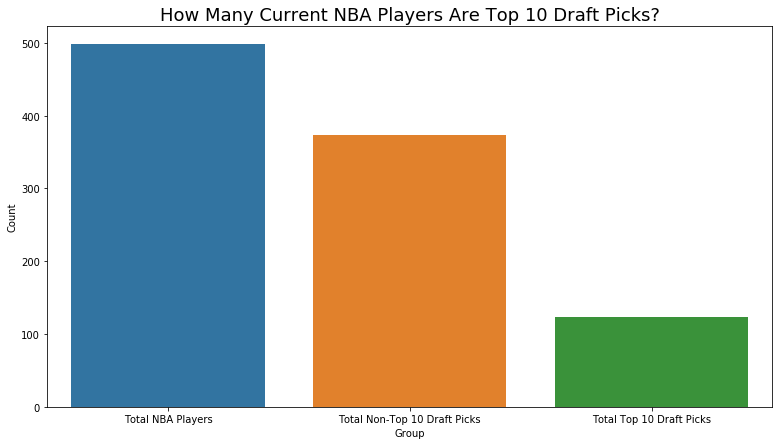

In [15]:
# Plotting bar graph of total current players in NBA, current players
# who are top 10 NBA draft picks, and current players who are not 
# top 10 NBA draft picks.

current_nba_data = [
    {
        "Group": "Total NBA Players",
        "Count": num_nba_players
    },
    {
        "Group": "Total Non-Top 10 Draft Picks",
        "Count": num_not_top10_draft_picks
    },
    {
        "Group": "Total Top 10 Draft Picks",
        "Count": num_top10_draft_picks
    }
]

current_nba_df = pd.DataFrame(current_nba_data)

plt.figure(figsize=(13,7))
plt.title("How Many Current NBA Players Are Top 10 Draft Picks?", fontsize=18)
seaborn.barplot(data=current_nba_df, x="Group", y="Count")
plt.show()

## 2C. Top 10 Draft Picks by Position

By looking at the chart below for sorting top 10 draft picks by position, it again, shows the 'Guard' position holds the top spot in terms of positions in the top 10 active draft picks in the league.  

In [16]:
by_pos_df = top10_df.groupby(top10_df["pos"]).count().reset_index()
by_pos_df = by_pos_df[["pos", "pickNum"]]
by_pos_df = by_pos_df.sort_values("pickNum", ascending=False)
by_pos_df.columns = ["Position", "Count"]
by_pos_df

,Position,Count
5,G,46
2,F,37
0,C,18
3,F-C,10
1,C-F,5
4,F-G,4
6,G-F,4


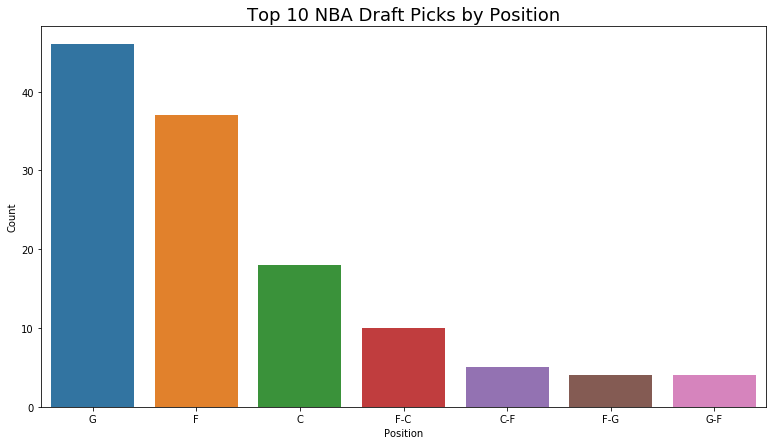

In [17]:
# Plotting top 10 draft picks by position.
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Position", fontsize=18)
seaborn.barplot(data=by_pos_df, x="Position", y="Count")
plt.show()

## 2D. Top 10 Draft Picks by Size

We can also look at the top 10 draft picks dataset by strictly size. This includes height and weight. If we look at the chart below we can see there is an obvious middle ground between 220 - 250 pounds. There is obviously a less of cluster as you get further away from this range. From this information, we also see there are few players that lie below 200 pounds. This contradicts our data from sorting top 10 draft picks by position. The 'Guard' position, historically, are the lowest weight players in the NBA, averaging around 190 pounds. However, as seen above, the 'Guard' position is the highest occuring position.|

In [18]:
# Top 10 Draft Picks by Weight
by_wt_df = top10_df.groupby(top10_df["weightPounds"]).count().reset_index()
by_wt_df = by_wt_df[["weightPounds", "pickNum"]]
by_wt_df = by_wt_df.sort_values("pickNum", ascending=False)
by_wt_df.columns = ["Weight", "Count"]
by_wt_df

,Weight,Count
21,220,12
34,250,10
30,240,8
5,190,7
11,200,7
23,225,6
32,245,5
19,215,5
13,205,4
39,265,4


As we can see in the bar graph, the weight varies quite a bit, but there is a small cluster between ~220 - 250 pounds.

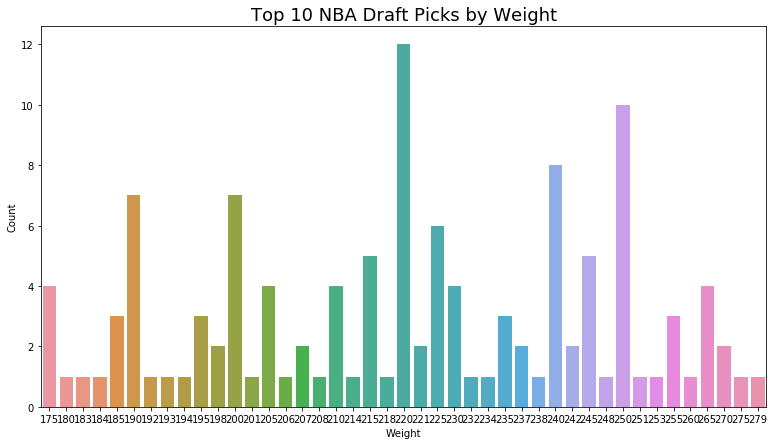

In [19]:
# Graphing the top 10 NBA draft picks by weight.
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Weight", fontsize=18)
seaborn.barplot(data=by_wt_df, x="Weight", y="Count")
plt.show()

Height is also included in size. Based on just the table, we can already see top 10 NBA draft picks are quite tall. Height is another major attribute when drafting players. A very tall player with quality coordination can dominate opponents inside the paint.

In [20]:
# Top 10 Draft Picks by Height
by_ht_df = top10_df.groupby(top10_df["heightTotal"]).count().reset_index()
by_ht_df = by_ht_df[["heightTotal", "pickNum"]]
by_ht_df = by_ht_df.sort_values("pickNum", ascending=False)
by_ht_df.columns = ["Height", "Count"]
by_ht_df

,Height,Count
12,7 0,14
6,6 4,13
11,6 9,13
2,6 10,12
3,6 11,12
9,6 7,11
10,6 8,11
5,6 3,10
7,6 5,7
8,6 6,7


Based on this bar graph, top 10 NBA Draft picks have a slight tendency to be taller on average. Unlike the previous graph, which was by weight, this graph's data is less sporadic. A majority of top 10 draft picks are 6' 7" or taller.

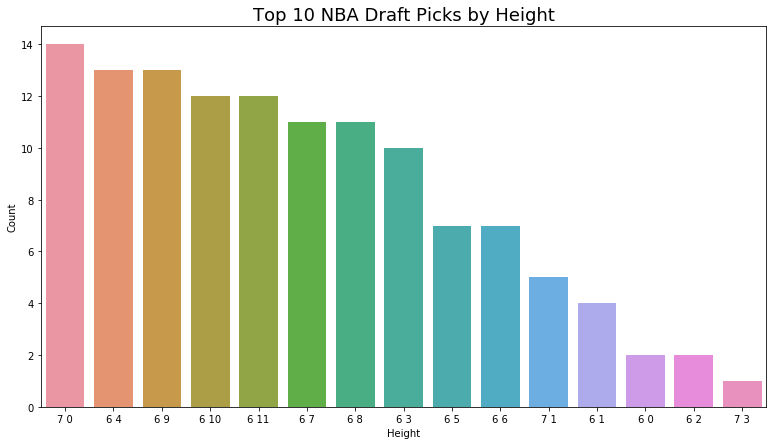

In [21]:
# Bar graph for top 10 NBA draft picks by height.
plt.figure(figsize=(13,7))
plt.title("Top 10 NBA Draft Picks by Height", fontsize=18)
seaborn.barplot(data=by_ht_df, x="Height", y="Count")
plt.show()

## 2E. Top 10 Draft Picks by Place of Origin

Another attribute to graph by is place of origin. Many NBA rookies, and eventually NBA stars, are drafted from major college basketball programs. The more money college basketball programs have, the more NBA prodigy's they can churn out. The results below are very expected. It is logical that the colleges which have historic basketball programs, which tend to have the most success each year as well as are perennial championship contenders, and which recruit the top prospects out of high school, are represented the most significantly in the Top 10 NBA Draft Pick data. Schools like Kentucky, Duke, Arizona, Indiana, Syracuse, and UNC are not only among the winningest college basketball teams, they also attract the most talented high school prospects. This results in the school also sending a fair amount of their most-talented players to the NBA. For example, the University of Kentucky is famous for their one-and-done basketball legacy. This means top recruited basketball players out of high school to the University of Kentucky only spend a year playing NCAA basketball, then get recruited in the top of their NBA class. This has been very frowned upon in the recent years due to schools seeming to focus more on what makes them money, sports, then academics, expecially for those who are recruited and stay in the college system for only one year. They lack any sort of education if their NBA career fails. However, the schools at the top of the list below are famous for winning seasons and winning the National Championship for college basketball. As an NBA team, why wouldn't you want to recruit from the teams who consistently win National Championships and produce the best basketball players?

In [22]:
# Top 10 Draft Picks by Place of Origin (College if attended, or city/country of residence). 
by_origin_df = top10_df.groupby(top10_df["lastAffiliation"]).count().reset_index()
by_origin_df = by_origin_df[["lastAffiliation", "pickNum"]]
by_origin_df = by_origin_df.sort_values("pickNum", ascending=False)
by_origin_df.columns = ["Place of Origin", "Count"]
by_origin_df

,Place of Origin,Count
38,Kentucky/USA,10
15,Duke/USA,6
2,Arizona/USA,4
32,Indiana/USA,4
63,Syracuse/USA,3
78,Washington/USA,3
49,North Carolina/USA,3
51,Ohio State/USA,3
9,Connecticut/USA,3
26,Georgetown/USA,3


# 3. Analysis of Top 10 Draft Picks' Attributes

## 3A. What Attributes Matter Most?

After we have gotten more comfortable with our dataset, we can continue to data analysis. First, we want to determine what attributes are important and which ones are not when selection a top 10 NBA draft pick. The first cell below shows all of the attributes we are currently holding.

In [23]:
# Viewing all the columns, or attributes, that we can use from the dataset.
attributes = top10_df.columns.tolist()
for a in attributes:
    print(a)

birthDay
birthMonth
birthYear
collegeName
country
draftYear
firstName
heightFeet
heightInches
heightTotal
lastAffiliation
lastName
nbaDebutYear
pickNum
pos
roundNum
teamId
weightPounds
yearsPro


Not all of the player attributes captured from the NBA API are pertinent to our analysis. We can remove unimportant player information that does not factor into whether a player is a top 10 draft pick, from the Top 10 Draft Picks DataFrame. We chose:
    - First Name
    - Last Name
    - Position
    - Height (Feet)
    - Height (Inches)
    - Weight (Pounds)
    - Date of Birth (Year)
    - Date of Birth (Month)
    - Date of Birth (Day)
    - College
    - Draft Round Number
    - Draft Pick Number
    - Draft Year

In [24]:
# Not all of the player attributes captured from the NBA API are needed
# for our analysis.
edited_top10_df = top10_df[["firstName", "lastName", "pickNum", \
                            "birthDay", "birthMonth", "birthYear", \
                           "collegeName", "country", "heightFeet", \
                           "heightInches", "pos", "weightPounds", \
                           "draftYear"]]
edited_top10_df.head()

,firstName,lastName,pickNum,birthDay,birthMonth,birthYear,collegeName,country,heightFeet,heightInches,pos,weightPounds,draftYear
5,LaMarcus,Aldridge,2,19,7,1985,Texas,USA,6,11,F,260,2006
9,Al-Farouq,Aminu,8,21,9,1990,Wake Forest,USA,6,9,F,220,2010
16,Carmelo,Anthony,3,29,5,1984,Syracuse,USA,6,8,F,240,2003
20,D.J.,Augustin,9,10,11,1987,Texas,USA,6,0,G,183,2008
21,Deandre,Ayton,1,23,7,1998,Arizona,Bahamas,7,1,C,250,2018


We must reduce our table to numerical values in order to run some kind of regression on it. We will have to measure our players based on objective numerical data, mainly values related to size, such as age, height, and weight, but also position and country of origin (as numerical values). View the columns on the far right-hand side of the DataFrame below to see these new columns. The follows the comments below.

In [25]:
# Converts position strings to corresponding numbers.
# Guard - 3
# Forward - 2
# Center - 1

def convert_position_to_num(pos):
    pos_str = pos[0]
    if pos_str == "G":
        return 3
    elif pos_str == "F":
        return 2
    elif pos_str == "C":
        return 1

# Converts country strings to corresponding numbers.
# USA = 1
# Other country = 0

def convert_country_to_num(country):
    if country == "USA":
        return 1
    else:
        return 0

edited_top10_df.loc[:, "Name"] = edited_top10_df["firstName"] + " " + edited_top10_df["lastName"] 
edited_top10_df.loc[:, "Draft Pick"] = edited_top10_df["pickNum"]
edited_top10_df.loc[:, "Age"] = edited_top10_df["draftYear"] - edited_top10_df["birthYear"]
edited_top10_df.loc[:, "Height"] = edited_top10_df["heightFeet"] * 12 - edited_top10_df["heightInches"]
edited_top10_df.loc[:, "Weight"] = edited_top10_df["weightPounds"]
edited_top10_df.loc[:, "Position"] = edited_top10_df.loc[:, "pos"].apply(convert_position_to_num)
edited_top10_df.loc[:, "Country"] = edited_top10_df.loc[:, "country"].apply(convert_country_to_num)
edited_top10_df

/home/matthewmuccio/.local/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/matthewmuccio/.local/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,firstName,lastName,pickNum,birthDay,birthMonth,birthYear,collegeName,country,heightFeet,heightInches,pos,weightPounds,draftYear,Name,Draft Pick,Age,Height,Weight,Position,Country
5,LaMarcus,Aldridge,2,19,7,1985,Texas,USA,6,11,F,260,2006,LaMarcus Aldridge,2,21,61,260,2,1
9,Al-Farouq,Aminu,8,21,9,1990,Wake Forest,USA,6,9,F,220,2010,Al-Farouq Aminu,8,20,63,220,2,1
16,Carmelo,Anthony,3,29,5,1984,Syracuse,USA,6,8,F,240,2003,Carmelo Anthony,3,19,64,240,2,1
20,D.J.,Augustin,9,10,11,1987,Texas,USA,6,0,G,183,2008,D.J. Augustin,9,21,72,183,3,1
21,Deandre,Ayton,1,23,7,1998,Arizona,Bahamas,7,1,C,250,2018,Deandre Ayton,1,20,83,250,1,0
23,Marvin,Bagley III,2,14,3,1999,Duke,USA,6,11,F,234,2018,Marvin Bagley III,2,19,61,234,2,1
26,Lonzo,Ball,2,27,10,1997,California-Los Angeles,USA,6,6,G,190,2017,Lonzo Ball,2,20,66,190,3,1
27,Mo,Bamba,6,12,5,1998,Texas,USA,7,0,C,221,2018,Mo Bamba,6,20,84,221,1,1
29,Harrison,Barnes,7,30,5,1992,North Carolina,USA,6,8,F,225,2012,Harrison Barnes,7,20,64,225,2,1
36,Bradley,Beal,3,28,6,1993,Florida,USA,6,5,G,207,2012,Bradley Beal,3,19,67,207,3,1


## 3B. Reducing and Comparing Attributes

Now, that we have limited our attributes, we will create a new dataframe to look at only the attributes that are most important.

In [26]:
# Creating a new reduced dataframe.
reduced_top10_df = edited_top10_df[["Name", "Draft Pick", "Age", "Height", "Weight", "Position", "Country"]]
reduced_top10_df.head()

,Name,Draft Pick,Age,Height,Weight,Position,Country
5,LaMarcus Aldridge,2,21,61,260,2,1
9,Al-Farouq Aminu,8,20,63,220,2,1
16,Carmelo Anthony,3,19,64,240,2,1
20,D.J. Augustin,9,21,72,183,3,1
21,Deandre Ayton,1,20,83,250,1,0


We are further reducing our DataFrame such that each individual value will become a rating of that category on a 0-100 scale. Simply divide the value by the maximum value in its column to obtain the rating. For the Position rating, it is more favorable for a player to be a Guard, then a Forward, than a Center in order to be selected higher, according to the data trends we saw above. (Thus, 1 = G, 0.66 = F, 0.33 = C) For the Country rating, it is more favorable for a player to be from the USA in order to be selected higher, according to the data trends we saw above. (Thus, 1 = USA, 0 = Any other country).

In [27]:
final_top10_df = reduced_top10_df.copy()
final_top10_df.loc[:, "Draft Pick"] = 100 * (1 - ((final_top10_df["Draft Pick"] - 1) / final_top10_df["Draft Pick"].max()))
final_top10_df.loc[:, "Age"] = 100 * (final_top10_df["Age"] / final_top10_df["Age"].max())
final_top10_df.loc[:, "Height"] = 100 * (final_top10_df["Height"] / final_top10_df["Height"].max())
final_top10_df.loc[:, "Weight"] = 100 * (final_top10_df["Weight"] / final_top10_df["Weight"].max())
final_top10_df.loc[:, "Position"] = 100 * (final_top10_df["Position"] / final_top10_df["Position"].max())
final_top10_df.loc[:, "Country"] = 100 * (final_top10_df["Country"] / final_top10_df["Country"].max())
final_top10_df.head()

,Name,Draft Pick,Age,Height,Weight,Position,Country
5,LaMarcus Aldridge,90,91.3043,72.619,93.19,66.666667,100.0
9,Al-Farouq Aminu,30,86.9565,75,78.853,66.666667,100.0
16,Carmelo Anthony,80,82.6087,76.1905,86.0215,66.666667,100.0
20,D.J. Augustin,20,91.3043,85.7143,65.5914,100.000000,100.0
21,Deandre Ayton,100,86.9565,98.8095,89.6057,33.333333,0.0


# 4. Finding Key Attributes Using Multiple Linear Regression

## 4A. Null Hypothesis Testing

We are trying to view the effects of five different, or aggregate player attributes (Age, Weight, Height, Position, and Country) on the overall player draft pick.

Null Hypothesis: None of the player attributes have a veritable impact on the player draft pick. In order to test the null hypothesis, we are going to perform Multiple Linear Regression on the dataset using SciKit-Learn.

## 4B. Using SciKit-Learn and StatsModels for Regression Model

We will use our reduced Top 10 Draft Pick DataFrame with the numerical player attributes for the multiple regression model. We will create a new DataFrame for the features of the regression. We will also create a new DataFrame for the target of the regression. The features act as the independent variables, which include Age, Weight, Height, Position, and Country when drafted. The target acts as the dependent variable, which is the player's overall draft pick.

In [28]:
columns = ["Age", "Weight", "Height", "Position", "Country"]
features = final_top10_df[columns]
target = final_top10_df[["Draft Pick"]]

Defines X and y for use in the LinearRegression() function from SciKit-Learn. We will then fit the linear regression model.

In [29]:
X, y = features, target["Draft Pick"]
lin_model = linear_model.LinearRegression()
model = lin_model.fit(X, y)

Our R-squared score is supposed to test how well the variance is explained by the model. As values range from 0 to 1, the 0.066 value means that none of the variance can be explained by the model.

In [30]:
lin_model.score(X, y)

0.06646315824053861

We will now find the coefficients from the model in order to determine which attributes had the least or most significant impact overall. It seem as though weight has the largest impact overall, and not much else seems to have a correlation. However, in order to determine with certainty which player attributes have the most impact on the overall draft pick and to test the null hypothesis correctly, we must calculate the p-values using StatsModels.

In [31]:
sklearn_coefficients = lin_model.coef_.tolist()
for i in range(len(columns)):
    print("Player Attribute: {0}, Coefficient: {1}".format(columns[i], sklearn_coefficients[i]))
    print()

Player Attribute: Age, Coefficient: -1.183334963400501

Player Attribute: Weight, Coefficient: 0.34881396034339474

Player Attribute: Height, Coefficient: -0.3270327185286698

Player Attribute: Position, Coefficient: 0.020243605293690153

Player Attribute: Country, Coefficient: -0.023549391367973516



We can reuse the Features (X) and Target (y) variables that we created in the last step to create a regression with stats model. We simply must add a constant in StatsModels. The model uses the method of Ordinary Least Squares. Its objective is to minimize the sum of squared distances between the actual numerical values in the dataset and the generated predicted values in the regression.

In [32]:
sm_X = X
sm_y = y

sm_X = sm.add_constant(X)

ols_model = sm.OLS(y.astype(float), X.astype(float)).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Draft Pick   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     99.67
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           7.48e-41
Time:                        17:17:50   Log-Likelihood:                -587.57
No. Observations:                 124   AIC:                             1185.
Df Residuals:                     119   BIC:                             1199.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.3195      0.455     -0.702      0.484      -1.220       0.581
Weight         1.0175      0.321      3.165      0.002       0.381       1.654
Height        -0.1535      0.303     -0.507      0.613      -0.754       0.447
Position       0.2345      0.134      1.749      0.083      -0.031       0.500
Country       -0.0264      0.063     -0.419      0.676      -0.151       0.099
==============================================================================
Omnibus:                       43.680   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.400
Skew:                          -0.073   Prob(JB):                       0.0247
Kurtosis:                       1.812   Cond. No.                         38.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The only player attributes that seem to have a meaningful impact on the  model is weight and position. As seen in the "P > |t|" column below, only two of the values are close to the critical value of 5% (p-value of 0.05), 0.002 and 0.083, for weight and position, respectively. We can partially reject the null hypothesis, because it is clear that some player attributes contribute to the overall draft pick. Our R-squared value, 0.807 is fair, as it shows that we did not overfit the model. We will be able to figure out more regarding our R-squared value in the next step with training and testing.

# 5. Predicting the Ideal Draft Pick Based on Player Attributes with ML

## 5A. Training and Testing

We will be able to re-use the features (X) and target (y) from the SciKit-Learn regression model. We will split the dataset into training data and testing data for both of the variables. Variables, training_X and training_y are used to generate, or train, the regression model. Then, the testing_X data is used with the model in order to make predictions for the predicted overall draft picks. Then, the predictions are compared to the actual draft picks in testing_y. We decided to split up training and testing data in a 75%/25% split, in favor of training. A majority of the dataset should be used for training the model, but since our dataset is not significantly large, we decided on 75% over 80%, 90%, or higher. We will display the first 15 results of the predicted draft picks.

In [33]:
training_X, testing_X, training_y, testing_y = model_selection.train_test_split(X, y, test_size=0.25)

lin_model = linear_model.LinearRegression()
model = lin_model.fit(training_X, training_y)

predictions = lin_model.predict(testing_X)

for p in predictions[0:15]:
    print(p)

45.609138541413955
64.40331011525883
58.18968850622154
66.41595408077855
64.96677510088088
65.3990736493505
63.586677934535274
54.078909573592426
55.61003041588606
63.58296514613826
65.83137219782014
53.9110483227645
48.31870341036114
53.74725863943901
58.38993675692603


We will then plot the predicted draft pick data from the linear regression model against the actual values from the dataset in the testing_y variable. We will add a trend/identity line to manifest how closely the predictions from the new linear regression model are to the actual player draft picks. If the predictions are accurate, the plot points will follow the trend line.

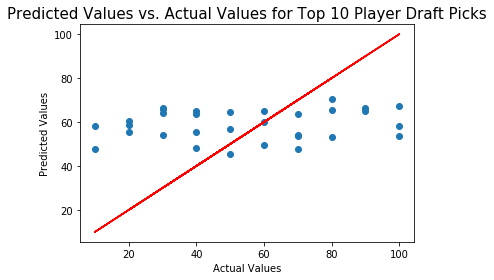

In [34]:
plt.figure(figsize=(6, 4))
plt.title("Predicted Values vs. Actual Values for Top 10 Player Draft Picks", fontsize=15)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.scatter(testing_y, predictions)
plt.plot(testing_y, testing_y, color="Red")
plt.show()

As we can see plot points do not follow the trend line very well. This is, again, proves only limited attributes have relationships.

# Project Conclusion

## 6A. Closing Statement About Attributes

From our models, it is clearly difficult to correlate player attributes to the overall draft pick. This only adds to the difficulty that Coaches, General Managers, Owners of NBA franchises face when the NBA Draft season comes around each year.

The only attribute that truly seemed to correlate with a higher draft pick was the weight of the player. It seems as though more research must be done in order to determine which player attributes matter most in regard to drafting a top 10 pick. It is surprising that other attributes such as height, colleges, or place of origin did not correlate more with the data. These attributes where among the strongest when analyzing different parts of the data. 

There are many other attributes that can be added or subtracted from this dataset. We did not touch any gameplay statistics from players. This could be the logical next step to creating an accurate model. One, the dataset would be much larger, since there are many, many gameplay statistics kept on each player. Two, we might be able to find that those attributes, meaning high gameplay statistics, would correlate better with players who were top 10 NBA draft picks and players who were not top 10 NBA draft picks.

## 6B. Closing Statement About Draft Pick Prediction

We now have a couple conclusions from our models. One, we can see that these attributes, while they seem strong on the surface, do not correlate closely to why a player is a top 10 draft pick. Two, these results give us a next step to look at other player attributes such as gameplay statistics from a top 10 draft pick before they were drafted, or looking at their performance in the league after they were drafted. These could give insight into what makes a top 10 NBA draft pick, while also making the sample size larger.

Even though the results where weak in terms of correlation, this does bring up a few good points. For example, there stereotypes like 'because a player played for University of Kentucky they will be a top 10 draft pick'. However, we can see that they almost do not correlate at all. From these results we can see that many aspects of the data can be improved and added upon to make a more accurate model and truly find 'What Makes a Top 10 NBA Draft Pick?'.

## 6C. Final Thoughts & Other Resources

Thank you very much for reading through our project and data analysis on Top 10 NBA Draft Picks. Please feel free to contact us with any comments, concerns, or feedback regarding the project, data analysis, or decriptions.

If you would like to learn more about similar topics and research about NBA statistics please visit the links below:

[The Length and Success of NBA Careers:Does College Production Predict Professional Outcomes?](http://college.holycross.edu/RePEc/spe/CoatesOguntimein_NBA.pdf)

[A Starting Point for Analyzing Basketball Statistics](https://www.degruyter.com/view/j/jqas.2007.3.3/jqas.2007.3.3.1070/jqas.2007.3.3.1070.xml?format=INT&intcmp=trendmd)